In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import csv
f = open('/content/gdrive/My Drive/mda/seoul.csv', encoding = 'cp949')
data = csv.reader(f)
next(data)

for row in data :
  print(row[-1])

20.7
22
21.3
22
25.4
21.3
16.1
14.9
21.1
24.1
20.4
17.4
21.3
20.6
20.9
20.2
21.6
20.9
21.3
22.7
19.9
19.6
16.3
17.1
18.7
18.2
20.7
19.6
20
20.1
20.3
21.3
21.1
11.1
13.6
17
18.1
12.4
9.4
11.9
13.2
13.4
14.9
16.4
15.2
17.6
12.6
11.7
6.7
4.3
7.1
6.2
11.2
9.9
5.9
-0.7
1.5
1.9
2
2.9
-2.4
1.4
3.4
6.1
1.3
2.6
5.8
1.9
6.6
8.1
4.3
0.6
3.8
9
6.4
-5.1
-2.4
-2.1
-0.4
-0.2
1.9
-8.1
-10.2
-9.4
0.9
6.8
6.4
-0.7
-1.9
-4.4
-6.1
-2.1
-1.3
-3
-2.9
-1.7
-0.1
2.9
-1.2
-0.9
2
3.3
4.8
4.5
4.7
0.1
0.9
-4.5
-3.6
2.8
2.8
2.3
-6.1
-5.1
-2.7
0.1
0.3
-0.6
0
-1.3
0.8
0.8
6.2
1.6
-0.2
-5.4
-4.1
-5.5
-5.7
-3.7
1.3
-4.1
-2.5
-2.8
-1.2
1.3
2.3
2
-1.4
-1.6
0.3
5.5
7.3
5.1
5.4
2.7
1.7
0.8
4.1
8.4
6.3
5.6
4
0.1
4.9
4
7.9
7.9
2.2
1.9
1.5
1.5
1.8
2.6
3.8
6.7
11.8
13.5
15.7
10.7
7.9
4.3
6
12.5
17
14.7
11.4
7.4
8
15.5
18.2
11.4
13.2
14.8
14.9
11.1
15
9.9
10.6
13.6
17.2
16.9
17.1
13.6
9.4
14.1
14.8
18.6
14.4
18.8
20.4
22.7
22.9
17.4
21.1
21.6
20.9
13.3
16.4
14.2
17.1
19.6
22.2
24.2
16.1
19
20.1
20.5
22.9
24.6
24.3
23.5
24.9
17

In [4]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null

In [0]:
# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

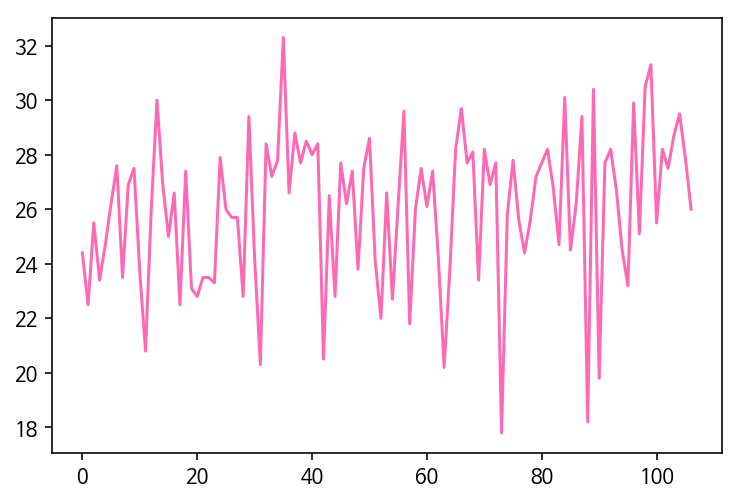

<Figure size 720x144 with 0 Axes>

In [6]:
import csv
import matplotlib.pyplot as plt
f = open('/content/gdrive/My Drive/mda/seoul.csv', encoding = 'cp949')
data = csv.reader(f)
next(data)
result = [] # 최고 기온 데이터를 저장할 리스트 생성

for row in data:
  if row[-1] != '': # 최고 기온 데이터 값이 존재한다면
    if row[0].split('-')[1] == '09' and row[0].split('-')[2] == '15': # 생일에 해당하는 값이라면
      result.append(float(row[-1])) # result 리스트에 최고 기온 값 추가

    
plt.plot(result, 'hotpink') # result 리스트에 저장된 값을 빨간색 그래프로 그리기
plt.figure(figsize = (10, 2))
plt.show() # 그래프 나타내기

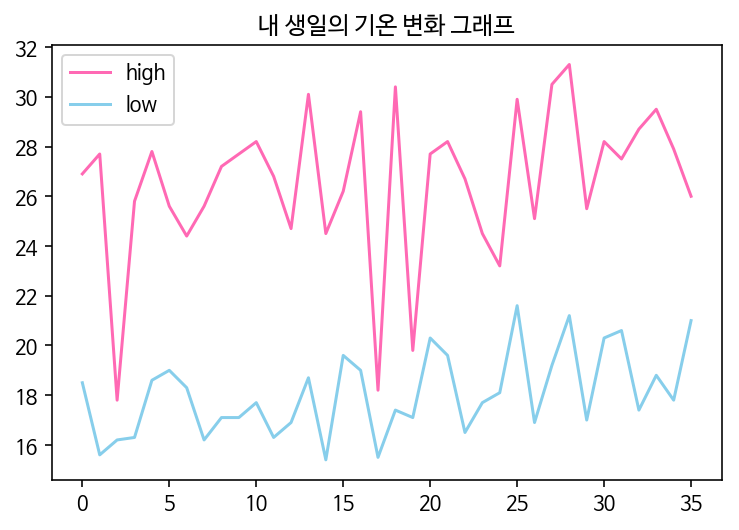

In [7]:
import csv
import matplotlib.pyplot as plt

f = open('/content/gdrive/My Drive/mda/seoul.csv', encoding = 'cp949')
data = csv.reader(f)
next(data)
high = [] # 최고 기온 값을 저장할 리스트 high 생성
low = [] # 최저 기온 값을 저장할 리스트 low 생성

for row in data:
  if row[-1] != '' and row[-2] != '': # 최고 기온 값과 최저 기온 값이 존재한다면
    if 1983 <= int(row[0].split('-')[0]): # 1983년 이후 데이터라면 
      if row[0].split('-')[1] == '09' and row[0].split('-')[2] == '15':
        high.append(float(row[-1])) # 최고 기온 값을 high 리스트에 저장
        low.append(float(row[-2])) #최저 기온 값을 low리스트에 저장

plt.rc('font', family = 'NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.title('내 생일의 기온 변화 그래프')
plt.plot(high, 'hotpink', label = 'high') # high 리스트에 저장된 값을 hotpink 색으로 그리기
plt.plot(low, 'skyblue',  label = 'low') # low 리스트에 저장된 값을 skyblue 색으로 그리기
plt.legend()
plt.show()